# Import libraries

In [112]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy
from matplotlib import pyplot
%matplotlib inline

# Prepare variables

In [113]:
def drop_duplicates(dataframe):
    print("Rows before drop",len(dataframe))
    dataframe.drop_duplicates(inplace=True)
    dataframe.dropna(how="all",axis=0, inplace=True)
    print("Rows after drop",len(dataframe))
    return dataframe
                     
def rc_drop_by_input(dataframe,drop_list,axis=1):    
    dataframe.drop(drop_list, axis = axis,inplace=True)  
    return dataframe

def scale_data(x):
    scaler = StandardScaler()
    scaler.fit(x)
    x_scaled = scaler.transform(x)
    x_scaled_df = pd.DataFrame(x_scaled, columns = x.columns)
    return x_scaled_df,scaler

def elbow_method(x_scaled_df):
    K = range(2, 21)
    inertia = []

    for k in K:
        kmeans = KMeans(n_clusters=k,
                        random_state=1234)
        kmeans.fit(x_scaled_df)
        inertia.append(kmeans.inertia_)

    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.figure(figsize=(16,8))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.xticks(np.arange(min(K), max(K)+1, 1.0))
    plt.title('Elbow Method showing the optimal k')
    
def run_kmeans(x_scaled_df,num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=1234)
    kmeans.fit(x_scaled_df)
    #Check number of clusters
    clusters = kmeans.predict(x_scaled_df)
    #clusters
    print("Number of items per cluster")
    print(pd.Series(clusters).value_counts().sort_index())
    print("...")
    print("...")
    print("inertia=",kmeans.inertia_)
    return kmeans,clusters

def save_pickle(var_to_save,file_path):
    with open(file_path, "wb") as f:
        pickle.dump(var_to_save,f)
        
def kmeans_graph(x_scaled_df,kmeans):
    # assign a cluster to each example
    labels = kmeans.predict(x_scaled_df)
    # retrieve unique clusters
    clusters2 = np.unique(labels)
    # create scatter plot for samples from each cluster
    for cluster in clusters2:
        # get row indexes for samples with this cluster
        row_ix = np.where(labels == cluster)
        # create scatter of these samples
        pyplot.scatter(x.to_numpy()[row_ix, 1], x.to_numpy()[row_ix, 2])
        # show the plot
    pyplot.show()
    
def silhouette_method(x_scaled_df):
    K = range(2, 20)
    silhouette = []

    for k in K:
        kmeans = KMeans(n_clusters=k,
                        random_state=1234)
        kmeans.fit(x_scaled_df)
        silhouette.append(silhouette_score(x_scaled_df, kmeans.predict(x_scaled_df)))


    plt.figure(figsize=(16,8))
    plt.plot(K, silhouette, 'bx-')
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.xticks(np.arange(min(K), max(K)+1, 1.0))
    plt.title('Silhouette Method showing the optimal k')

def silhouette_visualizer(x_scaled_df,num_clusters):
    from yellowbrick.cluster import SilhouetteVisualizer
    model = KMeans(n_clusters=num_clusters, random_state=1234)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(x_scaled_df)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure
    
def t_tests_for_clusters(dataframe,num_clusters):
    p=0
    num_df=dataframe._get_numeric_data()
    xcols=num_df.columns
    
    cluster_list=[]
    for i in range (0,num_clusters+1):
        cluster_list.append(dataframe[dataframe['clusters']==i])
    
    for i in xcols:
        for j in range (1,num_clusters):
            x,y=scipy.stats.ttest_ind(cluster_list[j-1][i],cluster_list[j][i])
            if y>.05:
                print(f"{i} for clusters {j-1} and {j}")
                p+=1
    print("Number of non-sig differences",p)

# Initial prep work

In [114]:
#Read file
df=pd.read_csv(r"Data\Song features\compiled_full_10000 - Copy.csv")

#Drop duplicates and unneeded columns
df=drop_duplicates(df)
drop_list=['id','artist','song_title']
x=df.copy()
x=rc_drop_by_input(x,drop_list)

#Recode and rescale
x.loc[x['explicit']==True,'explicit']=1
x.loc[x['explicit']==False,'explicit']=0
x_scaled_df,scaler=scale_data(x)

Rows before drop 19805
Rows after drop 19360


# Check best number of clusters

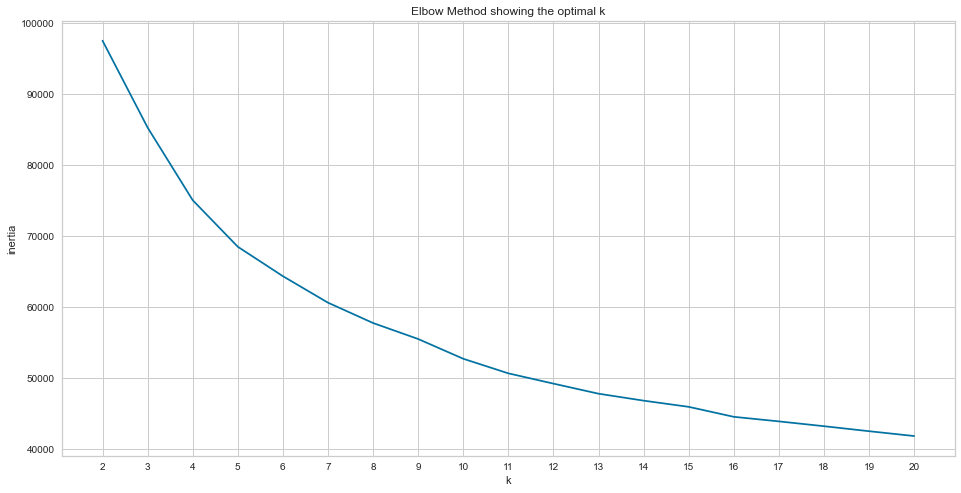

In [75]:
elbow_method(x_scaled_df)

# Check silhouette

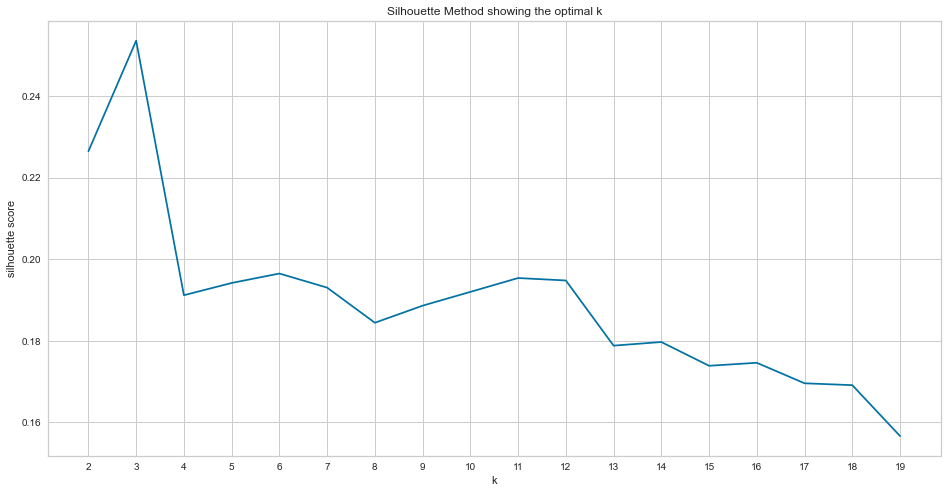

In [76]:
silhouette_method(x_scaled_df)

Number of items per cluster
0    3467
1    3256
2    2719
3    4589
4    3854
5    1475
dtype: int64
...
...
inertia= 120230.30186432907


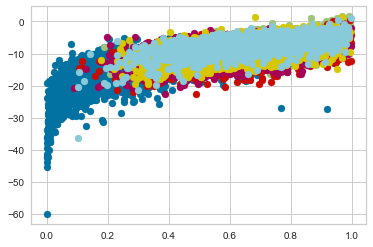

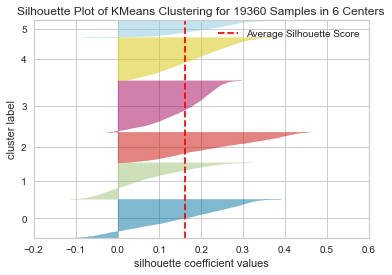

In [115]:
#Set number of clusters
num_clusters=6
#Run KMeans
kmeans,clusters=run_kmeans(x_scaled_df,num_clusters)
kmeans_graph(x_scaled_df,kmeans)
#Add back in relevant columns
x['clusters']=clusters
x['id']=df['id']
x['artist']=df['artist']
x['song_title']=df['song_title']
x['explicit']=x['explicit'].astype('int32')

#Check silhouette result
silhouette_visualizer(x_scaled_df,num_clusters)

#Save file and kmeans/scaler for predictor
save_pickle(kmeans,"Model/kmeans6.pickle")
save_pickle(scaler,"Model/scaler6.pickle")
x.to_csv("Data\songs_with_clusters6.csv")

# Full version of code for quick production of outputs


Rows before drop 19805
Rows after drop 19360
Number of items per cluster
0     1216
1     2546
2      981
3     1793
4     2160
5      581
6     1752
7      870
8      534
9     3051
10    1769
11    2107
dtype: int64
...
...
inertia= 91519.57072089206
energy for clusters 1 and 2
loudness for clusters 1 and 2
speechiness for clusters 0 and 1
liveness for clusters 7 and 8
liveness for clusters 9 and 10
tempo for clusters 7 and 8
tempo for clusters 9 and 10
popularity for clusters 2 and 3
Number of non-sig differences 8


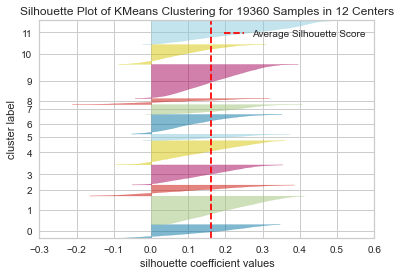

In [107]:
num_clusters=12
df=pd.read_csv(r"Data\Song features\compiled_full_10000 - Copy.csv")
df=drop_duplicates(df)
drop_list=['id','artist','song_title']
x=df.copy()
x=rc_drop_by_input(x,drop_list)
x.loc[x['explicit']==True,'explicit']=1
x.loc[x['explicit']==False,'explicit']=0
x_scaled_df,scaler=scale_data(x)
kmeans,clusters=run_kmeans(x_scaled_df,num_clusters)
x['clusters']=clusters
x['id']=df['id']
x['artist']=df['artist']
x['song_title']=df['song_title']
x['explicit']=x['explicit'].astype('int32')
t_tests_for_clusters(x,num_clusters)
silhouette_visualizer(x_scaled_df,num_clusters)

# KMeans graph

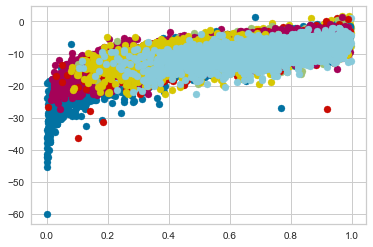

In [109]:
kmeans_graph(x_scaled_df,kmeans)

In [108]:
save_pickle(kmeans,"Model/kmeans12.pickle")
save_pickle(scaler,"Model/scaler12.pickle")
x.to_csv("Data\songs_with_clusters12.csv")